#  Machine Learning Project 

In [1]:
# importing necessary libraries

#basic
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string

#modelling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#performance metrics
from sklearn import metrics

# Problem 1

## Problem Statement

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [2]:
# getting the data dictionary
data_dict = pd.read_excel('Election_Data.xlsx',sheet_name='Sheet1')

In [3]:
pd.set_option('display.max_colwidth',None)
data_dict['index'] = data_dict['**Data Dictionary**'].apply(lambda x: x.split('.')[0])
data_dict['feature'] = data_dict['**Data Dictionary**'].apply(lambda x: re.findall('^[0-9]. ([\S]+):',x)[0])
data_dict['Description'] = data_dict['**Data Dictionary**'].apply(lambda x: ' '.join(x.split(':')[1:]))
data_dict.drop('**Data Dictionary**',axis=1,inplace=True)
data_dict.set_index('index')

,feature,Description
index,,
1,vote,Party choice Conservative or Labour
2,age,in years
3,economic.cond.national,"Assessment of current national economic conditions, 1 to 5."
4,economic.cond.household,"Assessment of current household economic conditions, 1 to 5."
5,Blair,"Assessment of the Labour leader, 1 to 5."
6,Hague,"Assessment of the Conservative leader, 1 to 5."
7,Europe,an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.
8,political.knowledge,"Knowledge of parties' positions on European integration, 0 to 3."
9,gender,female or male.


In [4]:
#importing the dataset

df = pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes',index_col='Unnamed: 0')

In [5]:
df.head() #top 5 rows of the dataset

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1,Labour,43,3,3,4,1,2,2,female
2,Labour,36,4,4,4,4,5,2,male
3,Labour,35,4,4,5,2,3,2,male
4,Labour,24,4,2,2,1,4,0,female
5,Labour,41,2,2,1,1,6,2,male


In [6]:
df.info() # information about features, their data type and number of rows 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 1 to 1525
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 119.1+ KB


In [7]:
df.isnull().sum() # check for null values

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

### EDA

In [8]:
cont = ['age']
# Statistical Desciption of continuous variables
for i in cont:
    print('Statistical Description of variable:',i,'\n')
    print(df[i].describe(),'\n'+100*'-')

Statistical Description of variable: age 

count    1525.000000
mean       54.182295
std        15.711209
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 
----------------------------------------------------------------------------------------------------


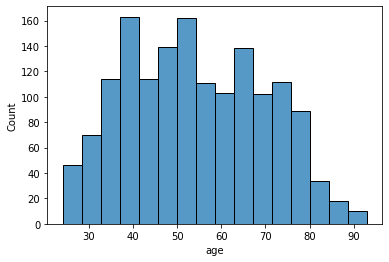

----------------------------------------------------------------------------------------------------


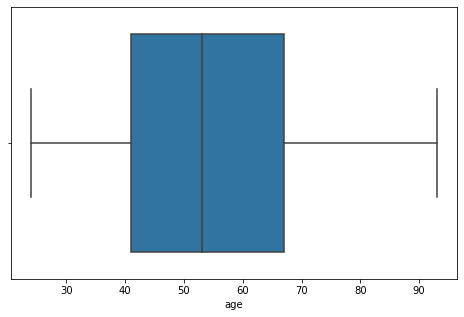

In [9]:
# Univariate analysis
sns.histplot(df['age']);
plt.show()
print(100*'-')
plt.figure(figsize = [8,5])
sns.boxplot(data = df,x='age');

In [10]:
cat = ['vote', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
# Value Count for these variables:
for i in cat:
    print('Value counts for different unique values in variable:',i,'\n')
    print(df[i].value_counts(),'\n'+100*'-')

Value counts for different unique values in variable: vote 

Labour          1063
Conservative     462
Name: vote, dtype: int64 
----------------------------------------------------------------------------------------------------
Value counts for different unique values in variable: economic.cond.national 

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64 
----------------------------------------------------------------------------------------------------
Value counts for different unique values in variable: economic.cond.household 

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64 
----------------------------------------------------------------------------------------------------
Value counts for different unique values in variable: Blair 

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64 
------------------------------------------------------------------------------------------------

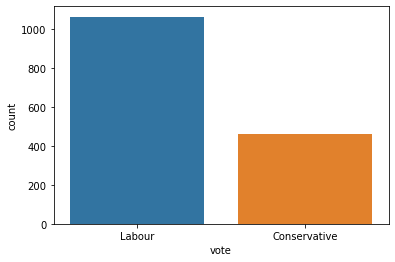

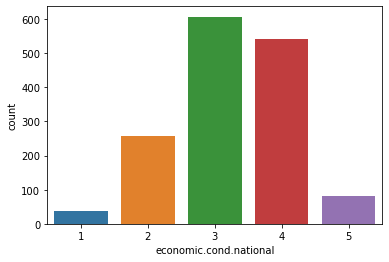

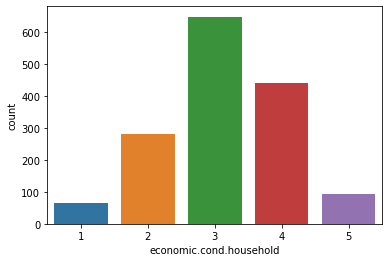

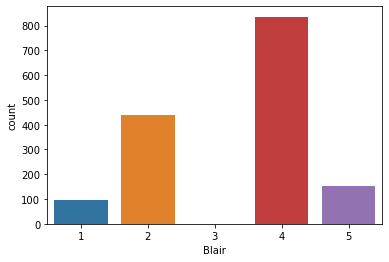

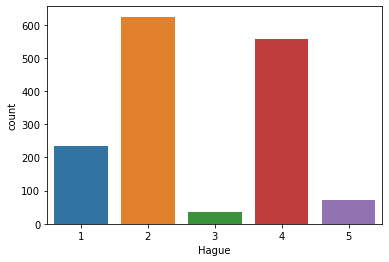

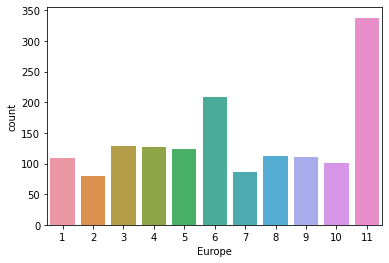

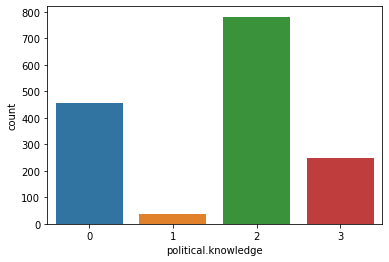

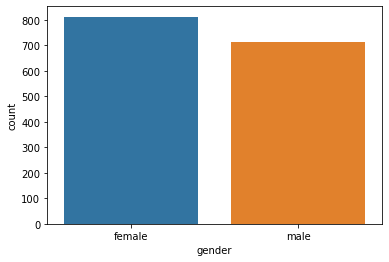

In [11]:
for i in df.columns:
    if i!= 'age':
        sns.countplot(data = df,x=i)
        plt.show()

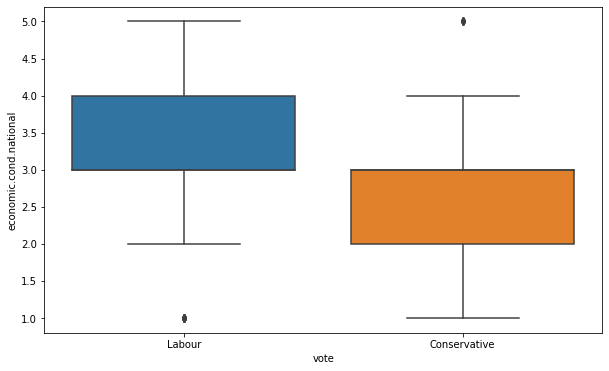

In [12]:
# bivariate Analysis
plt.figure(figsize=[10,6])
sns.boxplot(x='vote',data=df,y='economic.cond.national');

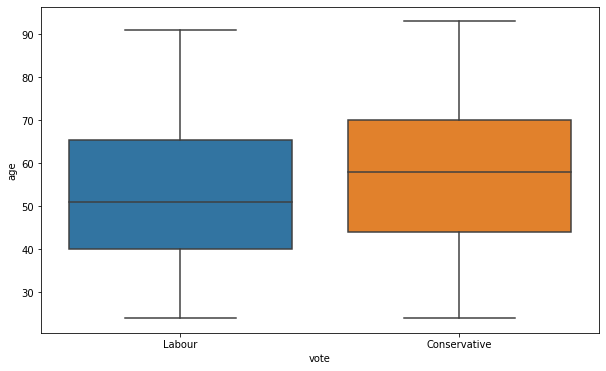

In [13]:
plt.figure(figsize=[10,6])
sns.boxplot(y='age',data=df,x='vote');

In [14]:
df['vote'] = df['vote'].replace('Labour',1).replace('Conservative',0)
df['gender'] = df['gender'].replace('female',1).replace('male',0)

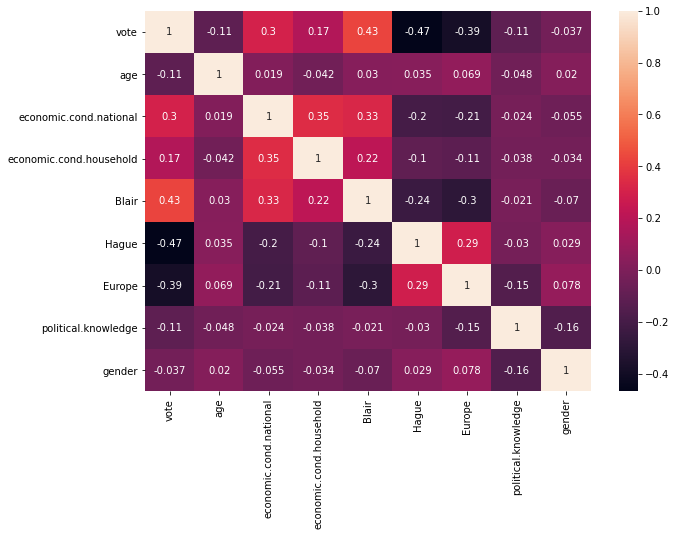

In [15]:
plt.figure(figsize=[10,7])
sns.heatmap(df.corr(),annot=True);

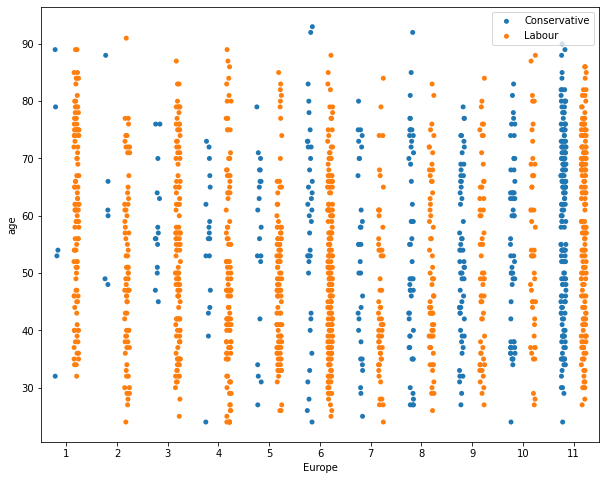

In [16]:
plt.figure(figsize=[10,8])
sns.stripplot(x='Europe',y='age',hue='vote',data=df,dodge=True);
plt.legend(labels=('Conservative','Labour'),loc=0);

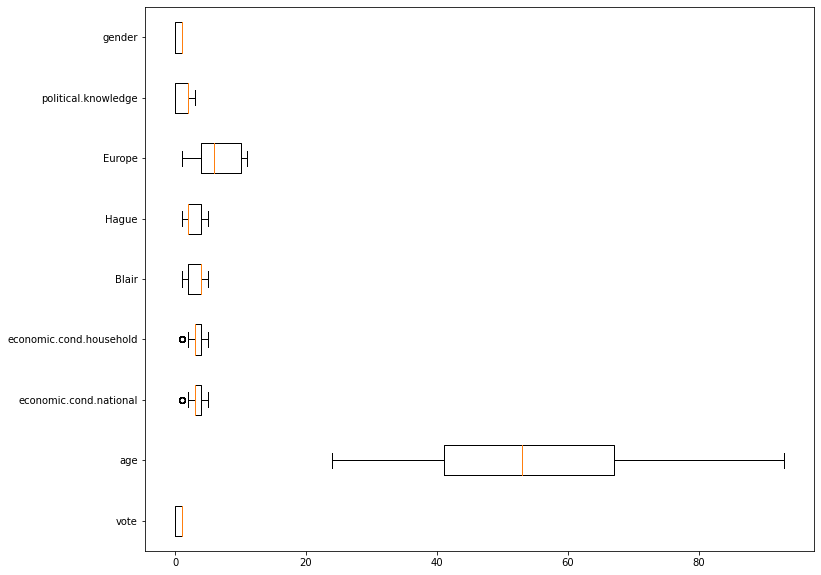

In [17]:
# Check for outliers
plt.figure(figsize=[12,10])
plt.boxplot(df,vert=False);
plt.yticks(range(1,10),df.columns);

In [18]:
def outliers(col):
    Q1 = np.quantile(col,0.25)
    Q3 = np.quantile(col,0.75)
    IQR = Q3-Q1
    min_v = Q1-1.5*IQR
    max_v = Q3 + 1.5*IQR
    Q2 = np.quantile(col,0.50)
    for i in range(1,len(col)+1):
        if (col[i]<min_v) or (col[i]>max_v):
            col[i] = Q2
    return col

In [19]:
for i in df.columns:
    print('Replacing outliers with Q2 values for variable:',i)
    a = outliers(df[i])

Replacing outliers with Q2 values for variable: vote
Replacing outliers with Q2 values for variable: age
Replacing outliers with Q2 values for variable: economic.cond.national
Replacing outliers with Q2 values for variable: economic.cond.household
Replacing outliers with Q2 values for variable: Blair
Replacing outliers with Q2 values for variable: Hague
Replacing outliers with Q2 values for variable: Europe
Replacing outliers with Q2 values for variable: political.knowledge
Replacing outliers with Q2 values for variable: gender


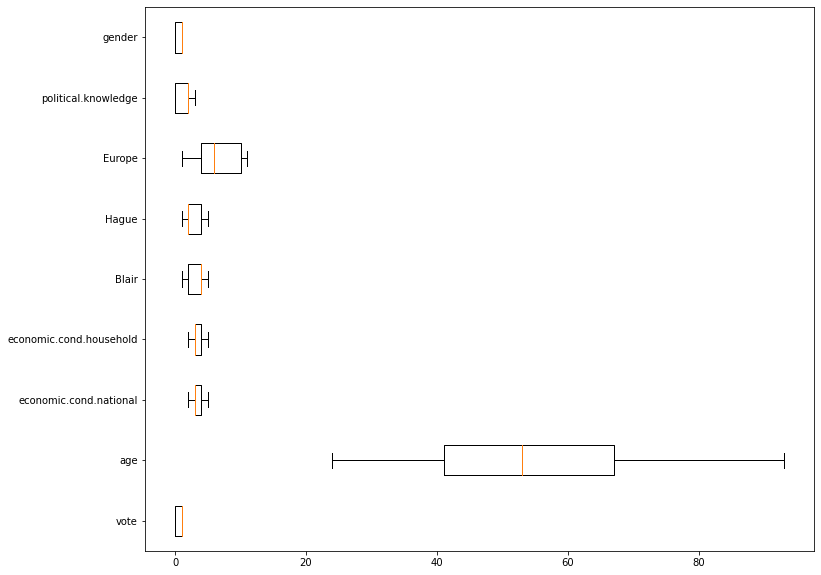

In [20]:
# Check for outliers
plt.figure(figsize=[12,10])
plt.boxplot(df,vert=False);
plt.yticks(range(1,10),df.columns);

## Train Test Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import MinMaxScaler
# Using the min max scaler for scaling the data
sc = MinMaxScaler()
df1 = sc.fit_transform(df)
df1 = pd.DataFrame(df1, columns=df.columns)

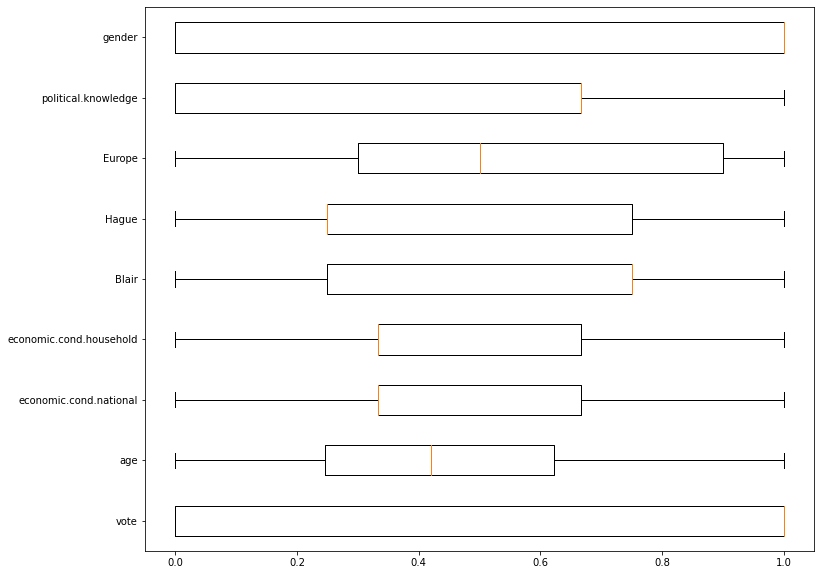

In [23]:
# Check for scaled data
plt.figure(figsize=[12,10])
plt.boxplot(df1,vert=False);
plt.yticks(range(1,10),df.columns);

In [24]:
X = df1.drop('vote',axis=1)
y = df1['vote']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
print('Class ratio in Train set\n',y_train.value_counts(normalize=True),'\n'+100*'-')
print('Class ratio in Test set\n', y_test.value_counts(normalize=True))

Class ratio in Train set
 1.0    0.691659
0.0    0.308341
Name: vote, dtype: float64 
----------------------------------------------------------------------------------------------------
Class ratio in Test set
 1.0    0.709607
0.0    0.290393
Name: vote, dtype: float64


## Logistic Regression and LDA models

In [26]:
lr_model = LogisticRegression(max_iter=1000,random_state=42)

In [27]:
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [28]:
pred_lr = lr_model.predict(X_test)

In [29]:
lr_model.score(X_train,y_train)

0.8491096532333646

In [30]:
lr_model.score(X_test,y_test)

0.8100436681222707

### Model Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
params = {'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
              'penalty' : ['l2'],
              'C' : [30],#300,100,,10,3,1,0.3,0.1,0.03,0.01],
          'max_iter':[1000],
          'random_state' : [42]}

In [33]:
gs = GridSearchCV(estimator=lr_model,
                  param_grid = params,
                  n_jobs=-1,
                  cv =5,
                  scoring = 'accuracy')

In [34]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [30], 'max_iter': [1000], 'penalty': ['l2'],
                         'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [35]:
gs.best_params_

{'C': 30,
 'max_iter': 1000,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear'}

In [36]:
lr_model = gs.best_estimator_
pred_lr = lr_model.predict(X_test)

In [37]:
lr_model.score(X_train,y_train)

0.8500468603561387

In [38]:
lr_model.score(X_test,y_test)

0.8100436681222707

In [39]:
coeff_ = pd.DataFrame(data = lr_model.coef_.T,columns=['coeff'])
coeff_['feature'] = ['age', 'economic.cond.national', 'economic.cond.household',
                     'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
coeff_['abs_coeff'] = abs(coeff_['coeff'])

In [40]:
coeff_.sort_values(by = 'abs_coeff',ascending= False)

,coeff,feature,abs_coeff
4,-3.317895,Hague,3.317895
3,2.735974,Blair,2.735974
5,-2.310641,Europe,2.310641
1,1.849493,economic.cond.national,1.849493
0,-1.355921,age,1.355921
6,-1.161387,political.knowledge,1.161387
7,-0.129412,gender,0.129412
2,0.007859,economic.cond.household,0.007859


              precision    recall  f1-score   support

         0.0       0.78      0.71      0.75       329
         1.0       0.88      0.91      0.89       738

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.85      0.85      0.85      1067



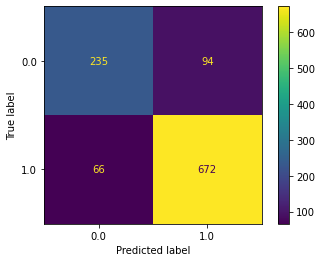

AUC score for Logistic regression model: 0.8962961590102224


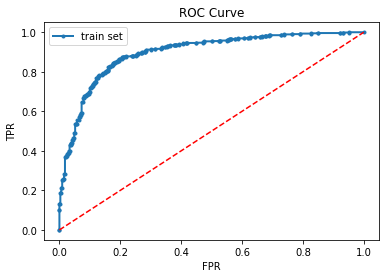

In [41]:
pred_lr_model = lr_model.predict(X_train)
#classification report
print(metrics.classification_report(y_train,pred_lr_model))

#Confusion Matrix
metrics.plot_confusion_matrix(lr_model,X_train,y_train);
plt.show()

y_proba = lr_model.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for Logistic regression model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65       133
         1.0       0.85      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.75      0.76       458
weighted avg       0.80      0.81      0.81       458



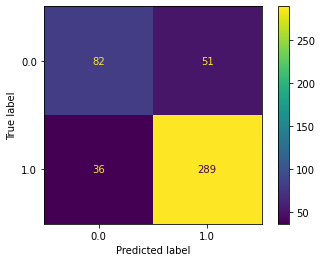

AUC score for Logistic regression model: 0.8720647773279352


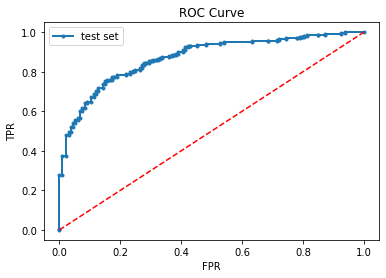

In [42]:
pred_lr_model = lr_model.predict(X_test)
#classification report
print(metrics.classification_report(y_test,pred_lr_model))

#Confusion Matrix
metrics.plot_confusion_matrix(lr_model,X_test,y_test);
plt.show()

y_proba = lr_model.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for Logistic regression model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

***

In [43]:
#-----------LDA MODEL------------

lda = LinearDiscriminantAnalysis()

In [44]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [45]:
pred_lda=lda.predict(X_test)

In [46]:
lda.score(X_train,y_train)

0.8444236176194939

In [47]:
lda.score(X_test,y_test)

0.8078602620087336

### Model Tuning

In [48]:
params = {'solver': ['lsqr', 'eigen'],
          'shrinkage': [0.02],#np.arange(0,1,0.01)
         'tol': [1e-1]}#,1e-2,1e-3,1e-4,1e-5,1e-6]}

In [49]:
gs = GridSearchCV(estimator=lda,param_grid=params,cv=5,n_jobs=-1,scoring='accuracy')

In [50]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': [0.02], 'solver': ['lsqr', 'eigen'],
                         'tol': [0.1]},
             scoring='accuracy')

In [51]:
gs.best_params_

{'shrinkage': 0.02, 'solver': 'lsqr', 'tol': 0.1}

In [52]:
lda = gs.best_estimator_

In [53]:
lda.score(X_train,y_train)

0.8434864104967198

In [54]:
lda.score(X_test,y_test)

0.8056768558951966

In [55]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [56]:
coeff_ = pd.DataFrame(data = lda.coef_.T,columns=['coeff'])
coeff_['feature'] = ['age', 'economic.cond.national', 'economic.cond.household',
                     'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
coeff_['abs_coeff'] = abs(coeff_['coeff'])
coeff_.sort_values(by = 'abs_coeff',ascending= False)

,coeff,feature,abs_coeff
4,-3.874974,Hague,3.874974
3,3.407626,Blair,3.407626
5,-2.535153,Europe,2.535153
1,1.709620,economic.cond.national,1.709620
0,-1.707273,age,1.707273
6,-1.594131,political.knowledge,1.594131
2,0.141014,economic.cond.household,0.141014
7,-0.094120,gender,0.094120


              precision    recall  f1-score   support

         0.0       0.76      0.72      0.74       329
         1.0       0.88      0.90      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



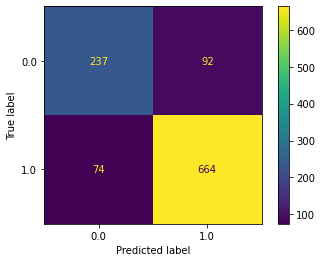

AUC score for LDA model: 0.895859589294981


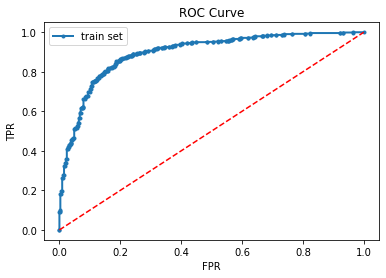

In [57]:
pred_lda = lda.predict(X_train)
#classification report
print(metrics.classification_report(y_train,pred_lda))

#Confusion Matrix
metrics.plot_confusion_matrix(lda,X_train,y_train);
plt.show()

y_proba = lda.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for LDA model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.67      0.65      0.66       133
         1.0       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



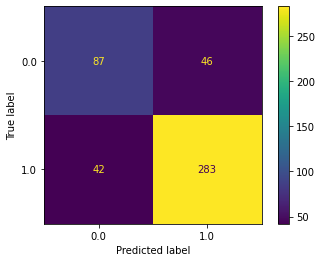

AUC score for LDA model: 0.8737073452862927


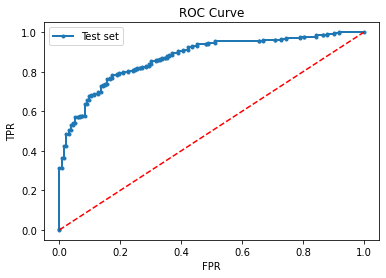

In [58]:
pred_lda = lda.predict(X_test)
#classification report
print(metrics.classification_report(y_test,pred_lda))

#Confusion Matrix
metrics.plot_confusion_matrix(lda,X_test,y_test);
plt.show()

y_proba = lda.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for LDA model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

***

## KNN and Naive Bayes Models

In [59]:
#---------------KNN Model------------

knn = KNeighborsClassifier()

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
pred_knn = knn.predict(X_test)

In [62]:
knn.score(X_test,y_test)

0.7882096069868996

### Hyper parameter tuning

In [63]:
params = {'n_neighbors' : [35],#np.arange(1, 40, 2),
          'weights'     : ['uniform', 'distance'],
          'metric'      : [ 'manhattan'],
         } #'euclidean', 'minkowski']}

In [64]:
gs = GridSearchCV(estimator=knn,
                 n_jobs = -1,
                 param_grid = params,
                 cv = 5)

In [65]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'], 'n_neighbors': [35],
                         'weights': ['uniform', 'distance']})

In [66]:
gs.best_params_

{'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}

In [67]:
knn = gs.best_estimator_

In [68]:
knn.score(X_train,y_train)

0.8425492033739457

In [69]:
knn.score(X_test,y_test)

0.8122270742358079

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.73       329
         1.0       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



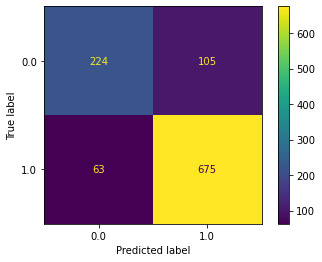

AUC score for KNN model: 0.9102766863534897


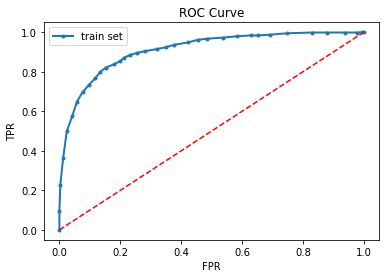

In [70]:
pred_knn = knn.predict(X_train)
# Classification report
print(metrics.classification_report(y_train,pred_knn))

#Confusion matrix
metrics.plot_confusion_matrix(knn,X_train,y_train);
plt.show()

y_proba = knn.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for KNN model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.70      0.62      0.66       133
         1.0       0.85      0.89      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.81      0.81      0.81       458



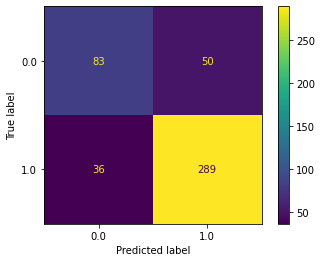

AUC score for KNN model: 0.8720185078079815


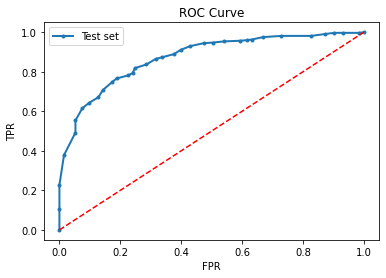

In [71]:
pred_knn = knn.predict(X_test)
# Classification report
print(metrics.classification_report(y_test,pred_knn))

#Confusion matrix
metrics.plot_confusion_matrix(knn,X_test,y_test);
plt.show()

y_proba = knn.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for KNN model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

***

In [72]:
#------------Naive Bayes Model-----------

nb = GaussianNB()

In [73]:
nb.fit(X_train,y_train)
pred_nb= nb.predict(X_test)

In [74]:
nb.score(X_train,y_train)

0.8425492033739457

In [75]:
nb.score(X_test,y_test)

0.8100436681222707

### Hyper Parameter Tuning

In [76]:
params = {'var_smoothing':[0.1555676143930472]}#np.logspace(0,-10,100) }

gs = GridSearchCV(estimator=nb,
                 param_grid=params,
                 cv = 5,
                 n_jobs=-1)

In [77]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.1555676143930472]})

In [78]:
gs.best_params_

{'var_smoothing': 0.1555676143930472}

In [79]:
nb = gs.best_estimator_

In [80]:
print(nb.score(X_train,y_train))
print(nb.score(X_test,y_test))

0.8434864104967198
0.8187772925764192


              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74       329
         1.0       0.87      0.91      0.89       738

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



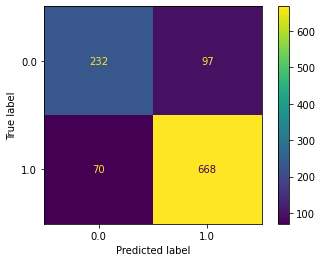

AUC score for Naive Byes model: 0.8938497211719838


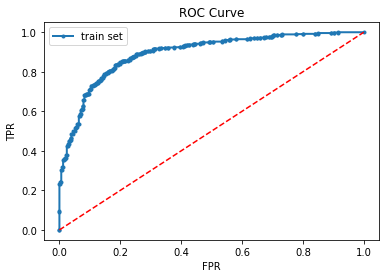

In [81]:
pred_nb= nb.predict(X_train)
# Classification report
print(metrics.classification_report(y_train,pred_nb))

#Confusion Matrix
metrics.plot_confusion_matrix(nb,X_train,y_train);
plt.show()

y_proba = nb.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for Naive Byes model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67       133
         1.0       0.86      0.89      0.87       325

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.81      0.82      0.82       458



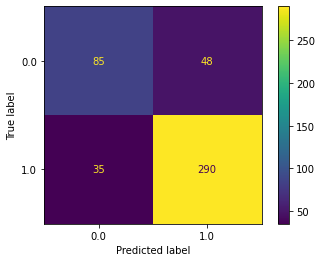

AUC score for Naive Byes model: 0.8685714285714287


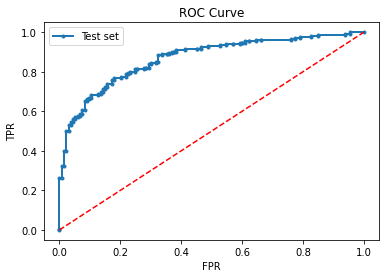

In [82]:
pred_nb= nb.predict(X_test)
# Classification report
print(metrics.classification_report(y_test,pred_nb))

#Confusion Matrix
metrics.plot_confusion_matrix(nb,X_test,y_test);
plt.show()

y_proba = nb.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for Naive Byes model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

## Bagging and Boosting

In [83]:
#-----------------BAGGING Model------------------

from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(random_state=42)

In [84]:
bag.fit(X_train,y_train)
pred_bag = bag.predict(X_test)

In [85]:
bag.score(X_train,y_train)

0.9831302717900656

In [86]:
bag.score(X_test,y_test)

0.8231441048034934

### Hyper Parameter Tuning

In [87]:
#-------------Random Forest Model----------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [88]:
params = {'max_depth': [6],#,4,5]
          'max_features' : ['auto'],#'sqrt'],
          'bootstrap' : [True],#False],
          'min_samples_leaf': [3],#1,10
          'min_samples_split': [3],#1,10
          'n_estimators': [100],#200,300,400,500
          'random_state' : [42]}


gs = GridSearchCV(estimator=rf,
                 param_grid=params,
                 cv = 5,
                 n_jobs=-1)

In [89]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [6],
                         'max_features': ['auto'], 'min_samples_leaf': [3],
                         'min_samples_split': [3], 'n_estimators': [100],
                         'random_state': [42]})

In [90]:
gs.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100,
 'random_state': 42}

In [91]:
best_rf = gs.best_estimator_

In [92]:
bag = BaggingClassifier(base_estimator = best_rf,random_state= 42)

In [93]:
params = {'n_estimators': [100]}#10,30,300]}

gs = GridSearchCV(estimator=bag,
                 param_grid=params,
                 cv = 5,
                 n_jobs=-1)

In [94]:
gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=6,
                                                                               min_samples_leaf=3,
                                                                               min_samples_split=3,
                                                                               random_state=42),
                                         random_state=42),
             n_jobs=-1, param_grid={'n_estimators': [100]})

In [95]:
gs.best_params_

{'n_estimators': 100}

In [96]:
best_bag = gs.best_estimator_

In [97]:
best_bag.score(X_train,y_train)

0.8791002811621368

In [98]:
best_bag.score(X_test,y_test)

0.8122270742358079

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79       329
         1.0       0.89      0.94      0.91       738

    accuracy                           0.88      1067
   macro avg       0.87      0.84      0.85      1067
weighted avg       0.88      0.88      0.88      1067



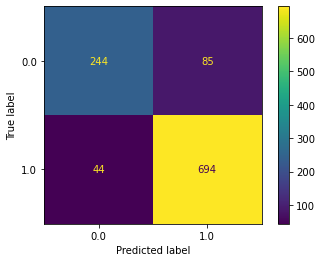

AUC score for bagging classifier model: 0.9396936598545317


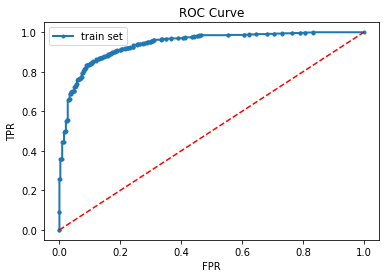

In [99]:
pred_bag = best_bag.predict(X_train)
# Classification report
print(metrics.classification_report(y_train,pred_bag))

#Confusion matrix
metrics.plot_confusion_matrix(best_bag,X_train,y_train);
plt.show()

y_proba = best_bag.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for bagging classifier model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.70      0.61      0.65       133
         1.0       0.85      0.90      0.87       325

    accuracy                           0.81       458
   macro avg       0.78      0.75      0.76       458
weighted avg       0.81      0.81      0.81       458



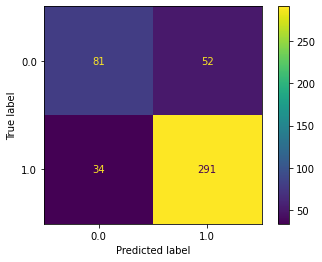

AUC score for bagging classifier model: 0.883285135916715


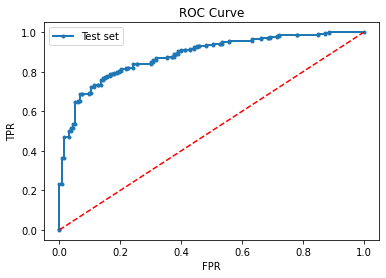

In [100]:
pred_bag = best_bag.predict(X_test)
# Classification report
print(metrics.classification_report(y_test,pred_bag))

#Confusion matrix
metrics.plot_confusion_matrix(best_bag,X_test,y_test);
plt.show()

y_proba = best_bag.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for bagging classifier model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

***

In [101]:
#-------------XGBOOST MODEL------------

from xgboost import XGBClassifier

In [102]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_test)

[10:17:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\devtripathi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [103]:
xgb.score(X_test,y_test)

0.7882096069868996

### Hyper Parameter Tuning

In [104]:
params = {'n_estimators' : [100], #10,30,300,1000],
         'learning_rate' : [0.1], #0.001, 0.01,],
          'subsample'    : [0.5], #, 0.7, 1.0],
          'max_depth'    : [3]} #, 7, 9]}

gs = GridSearchCV(estimator=xgb,
                 param_grid=params,
                 cv = 5,
                 n_jobs=-1)

In [105]:
gs.fit(X_train,y_train)

[10:17:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\devtripathi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree=1, random_state=42,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
        

In [106]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

In [107]:
xgb= gs.best_estimator_

In [108]:
xgb.score(X_train,y_train)

0.8828491096532334

In [109]:
xgb.score(X_test,y_test)

0.8100436681222707

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       329
         1.0       0.90      0.93      0.92       738

    accuracy                           0.88      1067
   macro avg       0.87      0.85      0.86      1067
weighted avg       0.88      0.88      0.88      1067



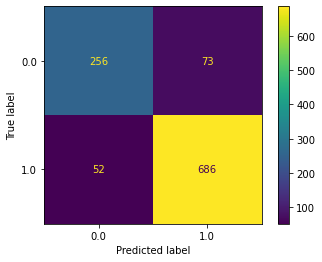

AUC score for XGBOOST classifier model: 0.9439357995403662


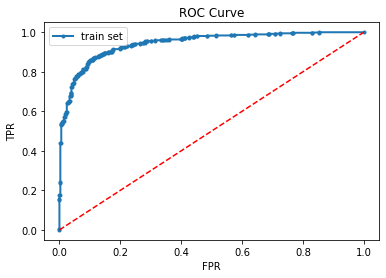

In [110]:
#Classification Report
pred_xgb = xgb.predict(X_train)
print(metrics.classification_report(y_train,pred_xgb))

# Confusion matrix
metrics.plot_confusion_matrix(xgb,X_train,y_train);\
plt.show()


y_proba = xgb.predict_proba(X_train)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_train,y_proba)
print('AUC score for XGBOOST classifier model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_train,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='train set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

              precision    recall  f1-score   support

         0.0       0.68      0.65      0.67       133
         1.0       0.86      0.87      0.87       325

    accuracy                           0.81       458
   macro avg       0.77      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



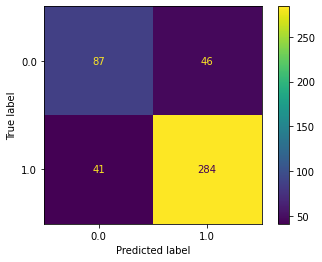

AUC score for XGBOOST classifier model: 0.8857374204742626


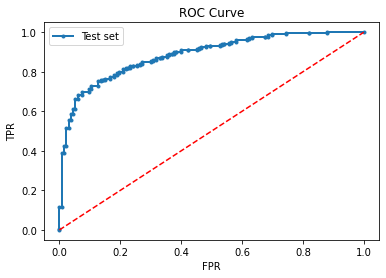

In [111]:
pred_xgb = xgb.predict(X_test)
#Classification Report
print(metrics.classification_report(y_test,pred_xgb))

# Confusion matrix
metrics.plot_confusion_matrix(xgb,X_test,y_test);\
plt.show()


y_proba = xgb.predict_proba(X_test)
y_proba = y_proba[:,1]

# ROC AUC Score

AUC = metrics.roc_auc_score(y_test,y_proba)
print('AUC score for XGBOOST classifier model:',AUC)

#ROC AUC Curve

[fpr,tpr,thresh]=metrics.roc_curve(y_test,y_proba)
plt.plot(fpr,tpr,linewidth=2,marker='.',label='Test set');
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--');
plt.show()

***

# Problem 2

In this problem, we are going to work on Inaugural Corpora from NLTK in python. It contains following speeches of presidents of United States of America:

1. President Franklin D. Roosevelt in 1941
2. President John F. Kennedy in 1961
3. President Richard Nixon in 1973

In [112]:
import nltk
# nltk.download('inaugural') #run this if inaugural corpus is not downloaded already
from nltk.corpus import inaugural

In [113]:
fids = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']

for i in fids:
    print('Number of characters in',i,'speech are:',len(inaugural.raw(fileids=i+'.txt')))
    print('Number of words in',i,'speech are:',len(inaugural.words(fileids=i+'.txt')))
    print('Number of sentences in',i,'speech are:',len(inaugural.sents(fileids=i+'.txt')),'\n'+100*'-')

Number of characters in 1941-Roosevelt speech are: 7571
Number of words in 1941-Roosevelt speech are: 1536
Number of sentences in 1941-Roosevelt speech are: 68 
----------------------------------------------------------------------------------------------------
Number of characters in 1961-Kennedy speech are: 7618
Number of words in 1961-Kennedy speech are: 1546
Number of sentences in 1961-Kennedy speech are: 52 
----------------------------------------------------------------------------------------------------
Number of characters in 1973-Nixon speech are: 9991
Number of words in 1973-Nixon speech are: 2028
Number of sentences in 1973-Nixon speech are: 69 
----------------------------------------------------------------------------------------------------


In [114]:
from string import punctuation

In [115]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)+['--','mr']

In [116]:
lower_case =dict() 
for i in fids:
    lower_case[i] = [x.lower() for x in inaugural.words(fileids=i+'.txt')]

In [117]:
clean_words = dict() #Cleaned words for each of the speech
for i in fids:
    clean_words[i] = [x for x in lower_case[i] if x not in stopwords] 

In [118]:
# from nltk.stem import PorterStemmer

# st = PorterStemmer()
# for i in fids:
#     clean_words[i] = list(map(lambda x: " ".join([st.stem(word) for word in x.split()]),clean_words[i]))

In [119]:
print(' '.join(inaugural.sents(fileids=fids[0]+'.txt')[0])) #Sample sentence before stopwords removal
print(' '.join(clean_words['1941-Roosevelt'][0:11])) # after stoopwords removal

On each national day of inauguration since 1789 , the people have renewed their sense of dedication to the United States .
national day inauguration since 1789 people renewed sense dedication united states


In [120]:
for i in fids:
    print("Number of words 'before' Stopword removal in",i+'.txt are:',len(inaugural.words(fileids=i+'.txt')))
    print("Number of words 'after' Stopword removal in",i+'.txt are:',len(clean_words[i]),'\n'+100*'-')

Number of words 'before' Stopword removal in 1941-Roosevelt.txt are: 1536
Number of words 'after' Stopword removal in 1941-Roosevelt.txt are: 632 
----------------------------------------------------------------------------------------------------
Number of words 'before' Stopword removal in 1961-Kennedy.txt are: 1546
Number of words 'after' Stopword removal in 1961-Kennedy.txt are: 695 
----------------------------------------------------------------------------------------------------
Number of words 'before' Stopword removal in 1973-Nixon.txt are: 2028
Number of words 'after' Stopword removal in 1973-Nixon.txt are: 833 
----------------------------------------------------------------------------------------------------


In [121]:
word_freq = dict() #word frequency (speechwise)

for i in fids:
    word_freq[i] = nltk.FreqDist(clean_words[i])

In [122]:
top_3w = dict() #top 3 words in each speech

for i in fids:
    top_3w[i] = word_freq[i].most_common(3)
    print('Top 3 words in',i,'speech are:',top_3w[i])

Top 3 words in 1941-Roosevelt speech are: [('nation', 12), ('know', 10), ('spirit', 9)]
Top 3 words in 1961-Kennedy speech are: [('let', 16), ('us', 12), ('world', 8)]
Top 3 words in 1973-Nixon speech are: [('us', 26), ('let', 22), ('america', 21)]


## Wordcloud 

In [123]:
from wordcloud import WordCloud,STOPWORDS 

In [124]:
wc = dict()
for i in fids:
    wc[i] = WordCloud(stopwords=STOPWORDS,width=3000,height=2500).generate(' '.join(clean_words[i]))

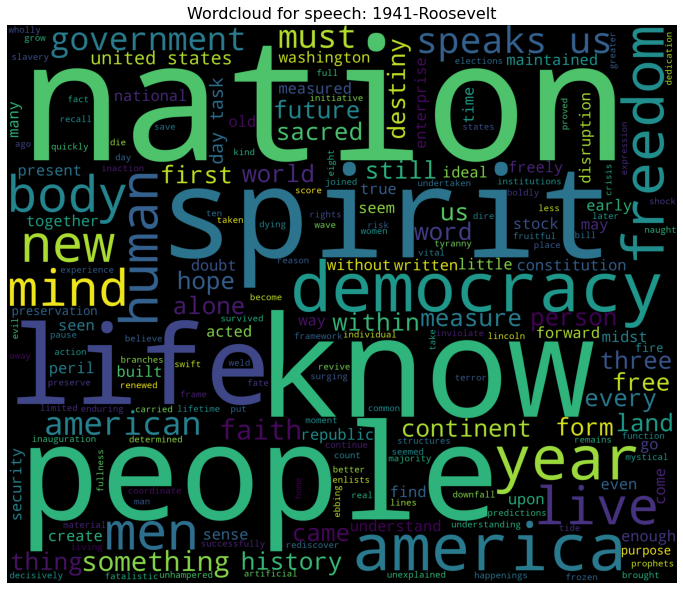

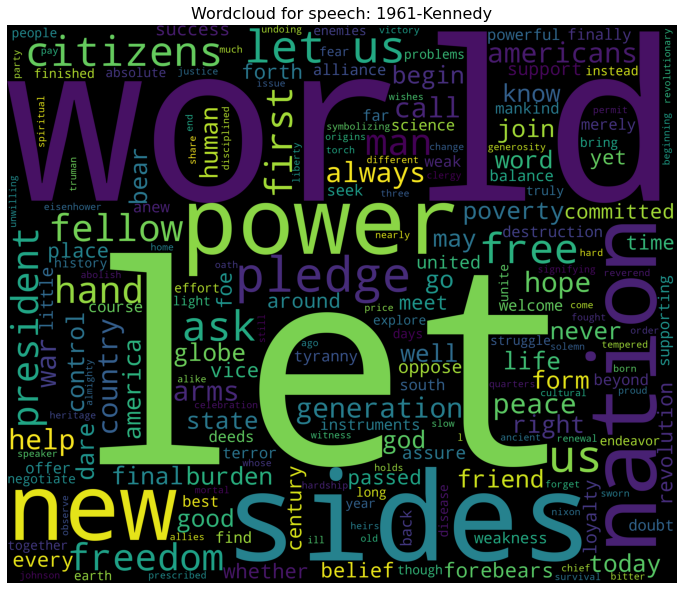

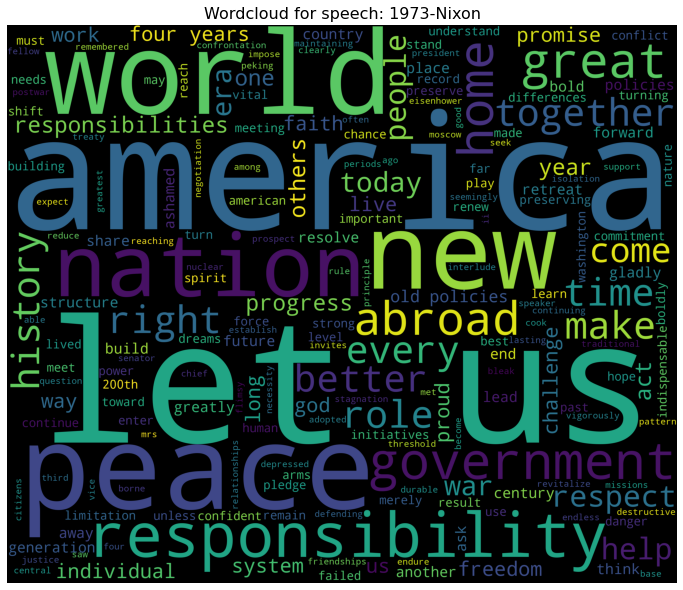

In [125]:
for i in fids:
    plt.figure(figsize=(12, 12))
    plt.imshow(wc[i])
    plt.axis('off')
    plt.title('Wordcloud for speech: '+i,fontsize=16)
    plt.show()